#### **DATA DICTIONARY**

##### **case_id:** No assigned to a patient
##### **Hospital_code_type:** How patients are classified based on their conditions (coded from a to g)
##### **Available Extra Room In Hospital:** No of beds available in each department of the hospital
##### **Department:** Departments in the hospital
##### **Ward_Type:** Wards where patients were admitted (FM- Female Medical; MM- Male Medical; FS- Female Surgical;                      MS- Male Surgical; Obs- Obstetrics)
##### **Bed Grade:** Hospital Bed Classification
##### **patientid:** Patients identifier
##### **City_Code_Patient:** Patients' address code
##### **Type of Admission:** Admission classification (Classified into Urgent, Trauma and Emergency)
##### **Severity of Illness:** How severe patient's condition (Classified into Minor, Moderate and Severe)
##### **Visitors with Patient:** No of relatives in hospital with the patient
##### **Age:** Age of the patient
##### **Stay:** Length of stay on admission

In [2]:
#pip install plotly

In [3]:
#pip install catboost

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plotly.offline.init_notebook_mode (connected = True)

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import confusion_matrix, classification_report

import pickle

import warnings
warnings.filterwarnings('ignore')

## LOAD DATA

In [6]:
data = pd.read_csv('admission_data.csv')

## DATA OVERVIEW

In [8]:
data.head()

,Unnamed: 0,case_id,Hospital_code_type,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Stay
0,0,1.0,c,3.0,Gynecology,FM,2.0,31397.0,7.0,Trauma,Severe,2.0,51-60,0-10
1,1,2.0,c,2.0,Gynecology,FM,2.0,31397.0,7.0,Urgent,Severe,2.0,51-60,41-50
2,2,3.0,e,2.0,Surgery,FM,2.0,31397.0,7.0,Urgent,Severe,2.0,51-60,31-40
3,3,4.0,b,2.0,Gynecology,FM,2.0,31397.0,7.0,Urgent,Severe,2.0,51-60,41-50
4,4,5.0,b,2.0,Gynecology,FM,2.0,31397.0,7.0,Urgent,Severe,2.0,51-60,41-50


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273286 entries, 0 to 273285
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         273286 non-null  int64  
 1   case_id                            273286 non-null  float64
 2   Hospital_code_type                 273286 non-null  object 
 3   Available Extra Rooms in Hospital  273286 non-null  float64
 4   Department                         273286 non-null  object 
 5   Ward_Type                          273286 non-null  object 
 6   Bed Grade                          273286 non-null  float64
 7   patientid                          273286 non-null  float64
 8   City_Code_Patient                  273286 non-null  float64
 9   Type of Admission                  273286 non-null  object 
 10  Severity of Illness                273286 non-null  object 
 11  Visitors with Patient              2732

In [10]:
# Data dimensionality
data.shape

(273286, 14)

In [11]:
# Check statistical description of the data (Numerical features)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,273286.0,153450.348781,95556.788497,0.0,69081.25,138549.5,239773.75,319382.0
case_id,273286.0,134306.469958,79195.992312,1.0,64943.00,134106.5,201744.75,274028.0
Available Extra Rooms in Hospital,273286.0,3.045407,1.141774,0.0,2.00,3.0,4.00,21.0
Bed Grade,273286.0,2.672632,0.877058,1.0,2.00,3.0,3.00,4.0
patientid,273286.0,66064.332147,38020.463310,2.0,33267.00,66200.0,98900.00,131623.0
City_Code_Patient,273286.0,7.186376,4.503039,1.0,4.00,8.0,8.00,37.0
Visitors with Patient,273286.0,3.310459,1.904412,0.0,2.00,3.0,4.00,32.0


In [12]:
# Check statistical description of the data (Categorical features)
data.describe(include='object').T

,count,unique,top,freq
Hospital_code_type,273286,7,a,128549
Department,273286,5,Int Med,90218
Ward_Type,273286,6,FM,61808
Type of Admission,273286,3,Urgent,134615
Severity of Illness,273286,3,Moderate,155031
Age,273286,10,41-50,48238
Stay,273286,11,21-30,74849


In [13]:
# Check for missing values
data.isnull().sum()

Unnamed: 0                           0
case_id                              0
Hospital_code_type                   0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Stay                                 0
dtype: int64

No missing value

<Axes: >

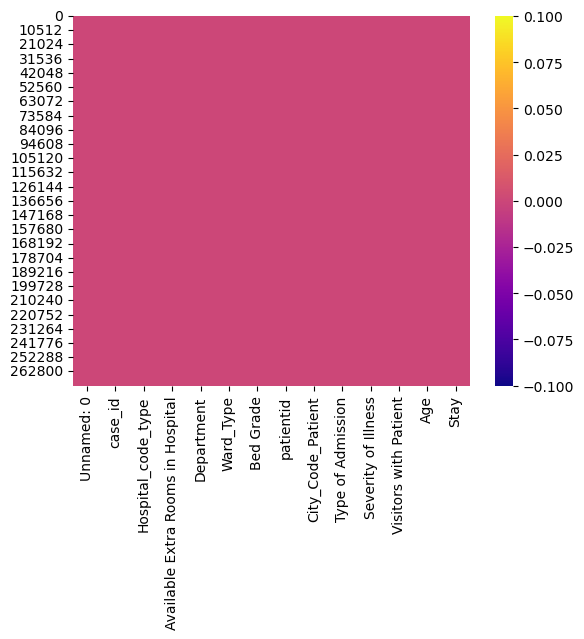

In [15]:
sns.heatmap(data.isna(),cmap='plasma')

In [16]:
# Check for duplicates
data.duplicated().sum()

0

No duplicate

### EXPLORATORY DATA ANALYSIS

##### UNIVARIATE

In [20]:
data['Stay'].value_counts()

Stay
21-30                 74849
11-20                 68421
31-40                 47090
51-60                 30572
0-10                  18130
71-80                  8989
41-50                  8928
More than 100 Days     7056
81-90                  4707
91-100                 2424
61-70                  2120
Name: count, dtype: int64

<Axes: xlabel='Stay', ylabel='Count'>

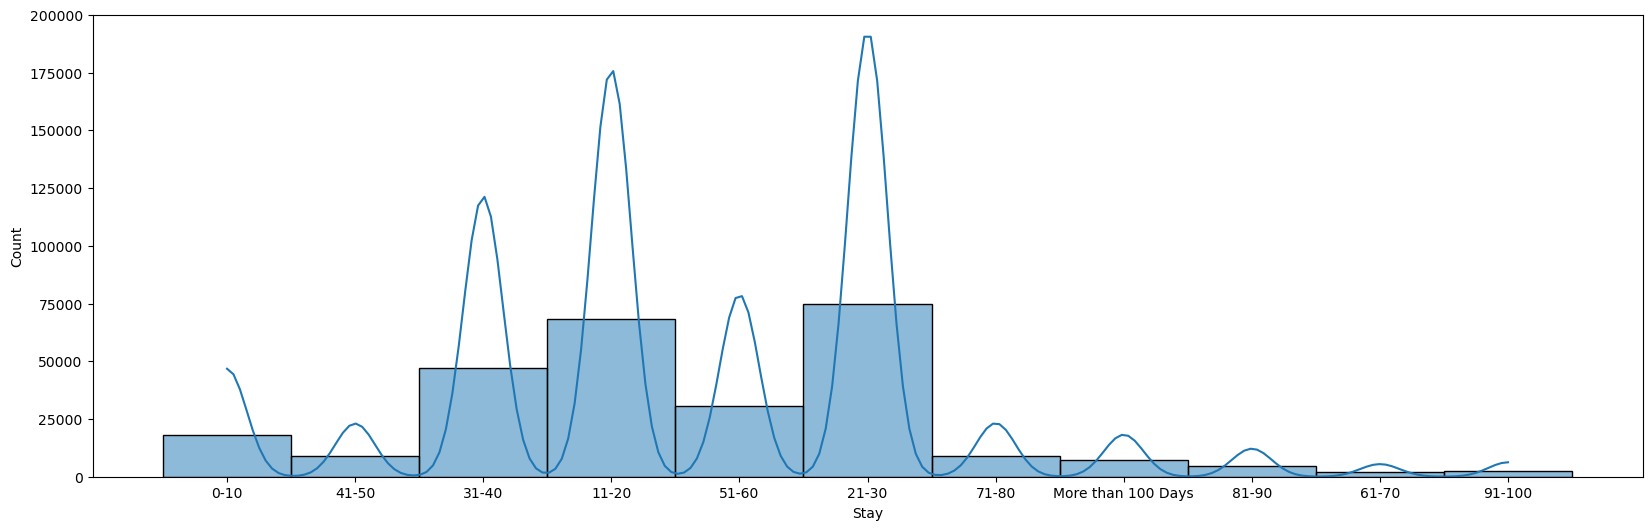

In [21]:
plt.figure(figsize=(20, 6))

sns.histplot(data=data, x='Stay', kde=True)

##### Most patients stayed in the hospital between 21-30 days
##### Next were patients that stayed between 11-20 days
##### Least were patients stayed between 61-70 days and 91-100 days

Text(0.5, 1.0, 'Distribution of Hospital Stay By Patients')

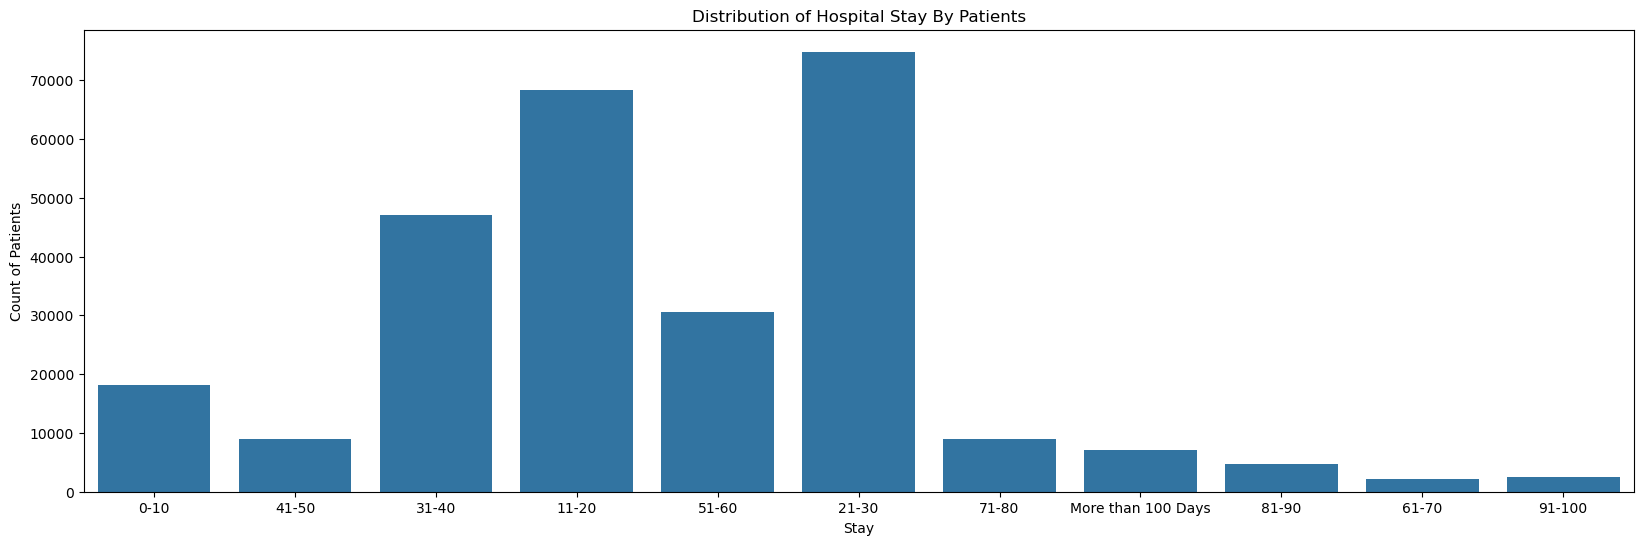

In [23]:
plt.figure(figsize=(20,6))
sns.countplot(x='Stay', data=data)
plt.xlabel('Stay')
plt.ylabel('Count of Patients')
plt.title('Distribution of Hospital Stay By Patients')

##### Same as shown on the histogram

Age
41-50     48238
31-40     45519
51-60     41758
71-80     40813
61-70     34579
21-30     30611
11-20     13029
81-90     10457
0-10       6541
91-100     1741
Name: count, dtype: int64


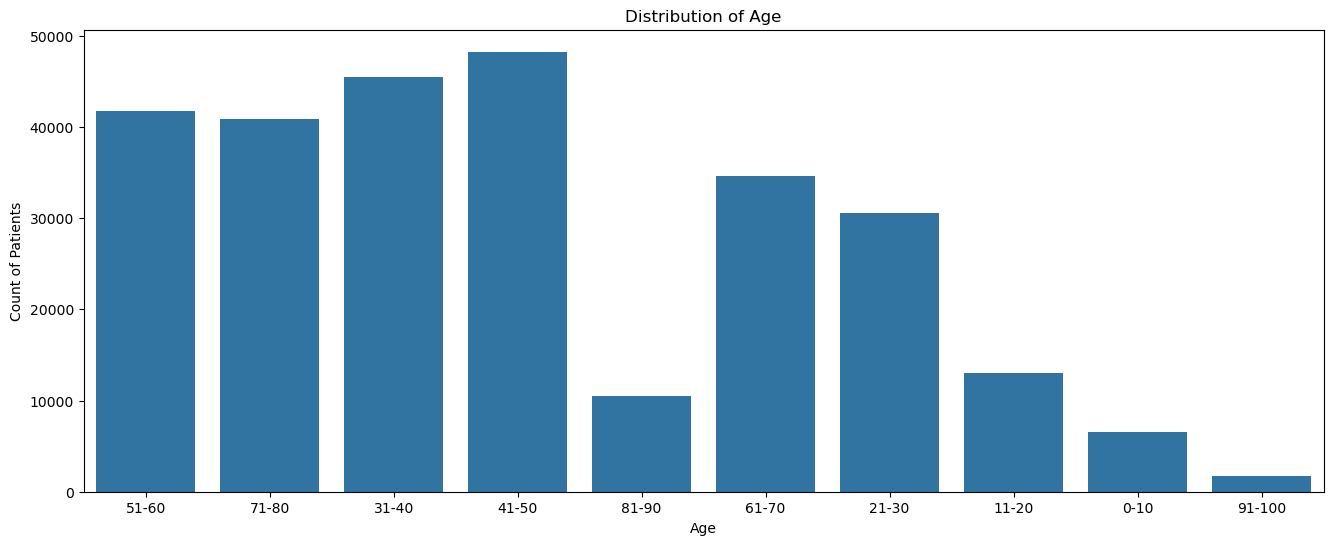

In [25]:
plt.figure(figsize=(16,6))
sns.countplot(x='Age', data=data)
plt.xlabel('Age')
plt.ylabel('Count of Patients')
plt.title('Distribution of Age')
print(data['Age'].value_counts())

##### Most patients were aged 41-50 (48,238) followed by 31-40 years (45,519)
##### Least were 91-100 years (1741) followed by 0-10 years (6,541)

Department
Int Med               90218
Gynecology            81763
Surgery               66769
Paediatric            20831
TB & Chest disease    13705
Name: count, dtype: int64


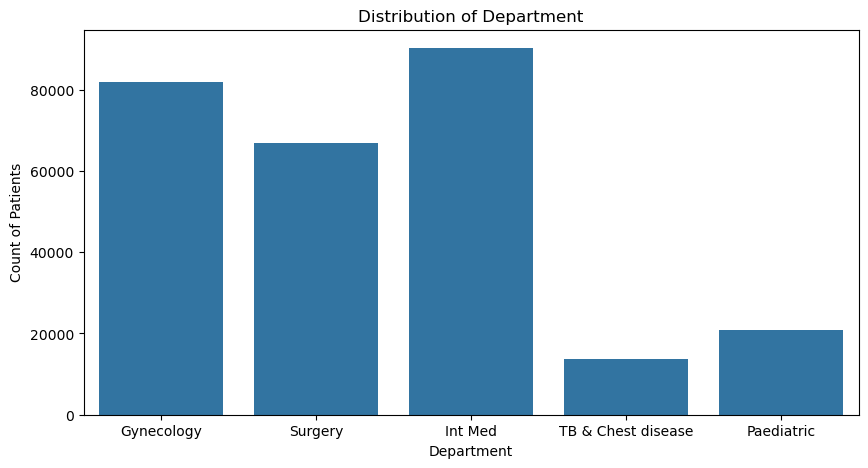

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='Department', data=data)
plt.xlabel('Department')
plt.ylabel('Count of Patients')
plt.title('Distribution of Department')
print(data['Department'].value_counts())

##### Department of Int Med carried the burden of patients load (90,218) closely followed by Gynecology (81,763) while Surgery had 66,769
##### TB & Chest disease had least number of patients (13,705) followed by Paeditric (20,831)

Severity of Illness
Moderate    56.73
Minor       22.42
Severe      20.85
Name: count, dtype: float64


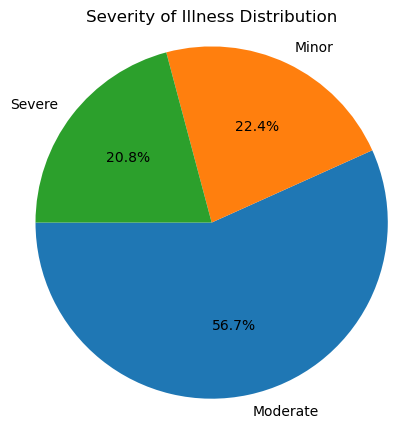

In [29]:
Outcome = round(data['Severity of Illness'].value_counts()/data.shape[0]*100,2)
print(Outcome)

# Plot pie chart for ratings distribution
plt.figure(figsize=(5,5))
plt.pie(Outcome, labels=Outcome.index, autopct='%1.1f%%', startangle=180)
plt.title('Severity of Illness Distribution')
plt.axis('equal')
plt.show()

##### More than half of patients presented with moderate illness (56.7%) followed by minor ilness (22.4%) while 20.8% presented with severe illness

Type of Admission
Urgent       49.26
Trauma       38.99
Emergency    11.76
Name: count, dtype: float64


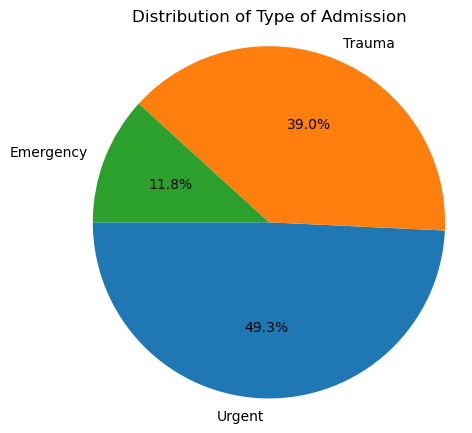

In [31]:
Outcome = round(data['Type of Admission'].value_counts()/data.shape[0]*100,2)
print(Outcome)

# Plot pie chart for ratings distribution
plt.figure(figsize=(5,5))
plt.pie(Outcome, labels=Outcome.index, autopct='%1.1f%%', startangle=180)
plt.title('Distribution of Type of Admission')
plt.axis('equal')
plt.show()

##### Half of admissions were of urgent type (49.3%), 39.0% were of trauma while emrgency admissions constituted 11.8%

Ward_Type
FM       61808
Obs      57663
MM       46745
MS       43578
Gynae    32417
FS       31075
Name: count, dtype: int64


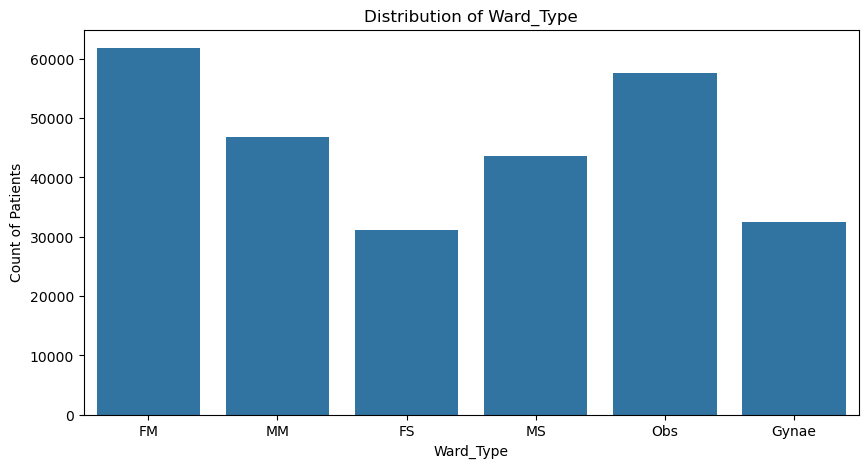

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x='Ward_Type', data=data)
plt.xlabel('Ward_Type')
plt.ylabel('Count of Patients')
plt.title('Distribution of Ward_Type')
print(data['Ward_Type'].value_counts())

##### FM ward had most patients, followed by Obs
##### FS had least followed by Gynae

Hospital_code_type
a    128549
b     61077
c     36560
e     20179
d     15228
f      8667
g      3026
Name: count, dtype: int64


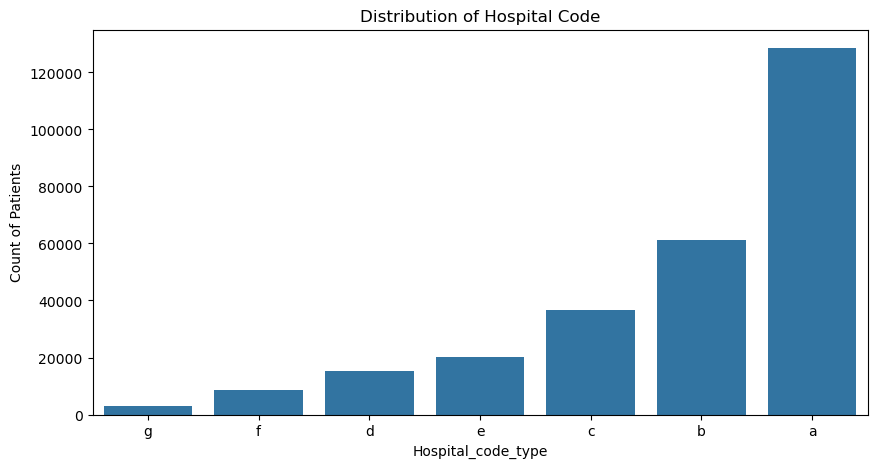

In [35]:
plt.figure(figsize=(10,5))
sorted_order = data['Hospital_code_type'].value_counts().sort_values(ascending=True).index
sns.countplot(x='Hospital_code_type', data=data,  order=sorted_order)
plt.xlabel('Hospital_code_type')
plt.ylabel('Count of Patients')
plt.title('Distribution of Hospital Code')
print(data['Hospital_code_type'].value_counts())

##### Patients with Hospital Code a made the bulk of the patients followed by Code b, then Code c
##### The least was Code g, followed by Code f, then Code d

##### BIVARIATE

In [38]:
data_beds=data[['Ward_Type','Available Extra Rooms in Hospital','Department']]
data_beds['Department']=data_beds['Department'].map({'Int Med':1, 'Surgery':2,'Paediatric':3, 'Gynecology':4, 'TB & Chest disease':5})
data_beds_grouped=data_beds.groupby('Ward_Type')[['Available Extra Rooms in Hospital','Department']].median().reset_index()

In [39]:
data_beds_grouped['Department']=data_beds_grouped['Department'].map({1:'Int Med', 2:'Surgery', 3:'Paediatric', 4:'Gynecology', 5:'TB & Chest disease'})
data_beds_grouped.head()

,Ward_Type,Available Extra Rooms in Hospital,Department
0,FM,3.0,Surgery
1,FS,3.0,Surgery
2,Gynae,3.0,Surgery
3,MM,3.0,Surgery
4,MS,3.0,Surgery


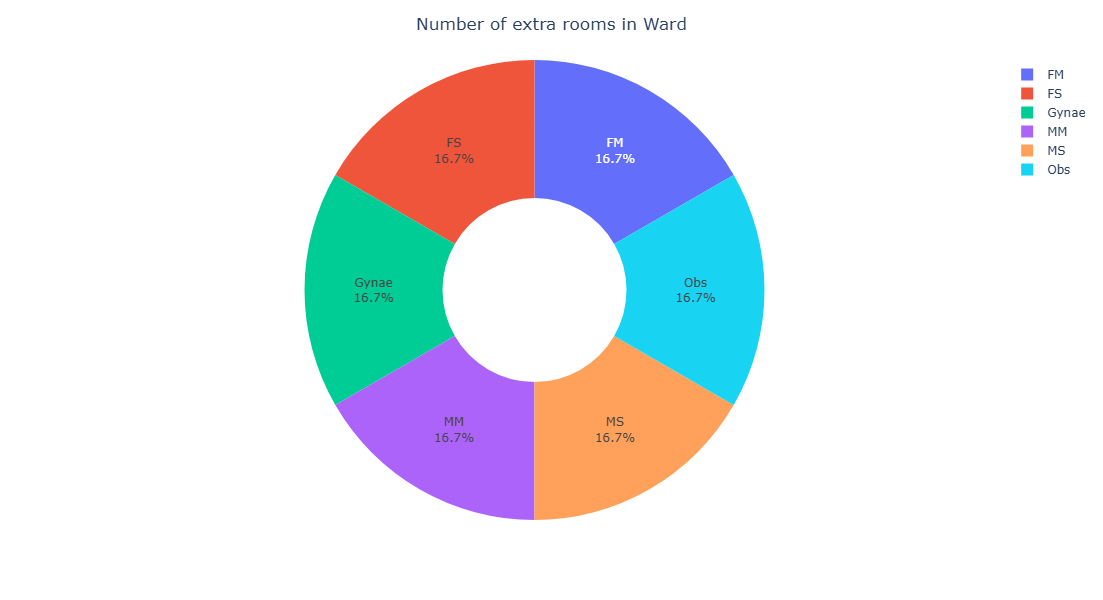

In [40]:
data_beds_1=data_beds_grouped.groupby('Ward_Type')['Available Extra Rooms in Hospital'].sum().reset_index()
fig=px.pie(data_beds_1,values='Available Extra Rooms in Hospital',names='Ward_Type',hole=0.4)
fig.update_layout(title='Number of extra rooms in Ward',title_x=0.5, width=600, height=600)
fig.update_traces(textinfo='percent+label')

##### Room availability is evenly distributed among the wards (16.7%)

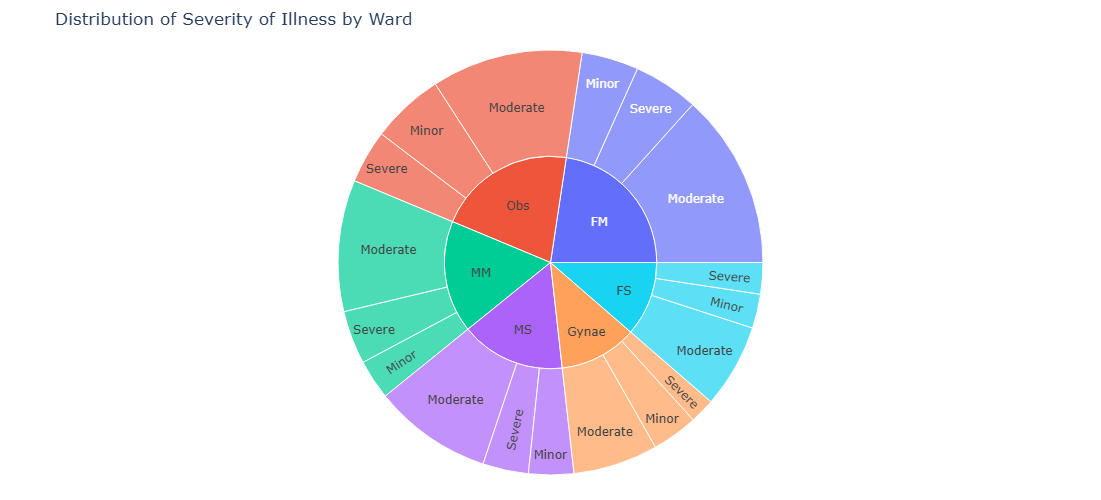

In [42]:
fig1=px.sunburst(data,path=['Ward_Type','Severity of Illness'], title='Distribution of Severity of Illness by Ward')
fig1.update_layout(height=500, width=500, margin=dict(t=50, l=25, r=25, b=25))
fig1.show()

##### Moderate illness is the common severity of illness in all the wards, followed by minor illness in Obs, Gynae and FS while severe illness is the 2nd common in FM, MM and MS


Text(0.5, 1.0, 'Length of Hospital Stay by Ward Type')

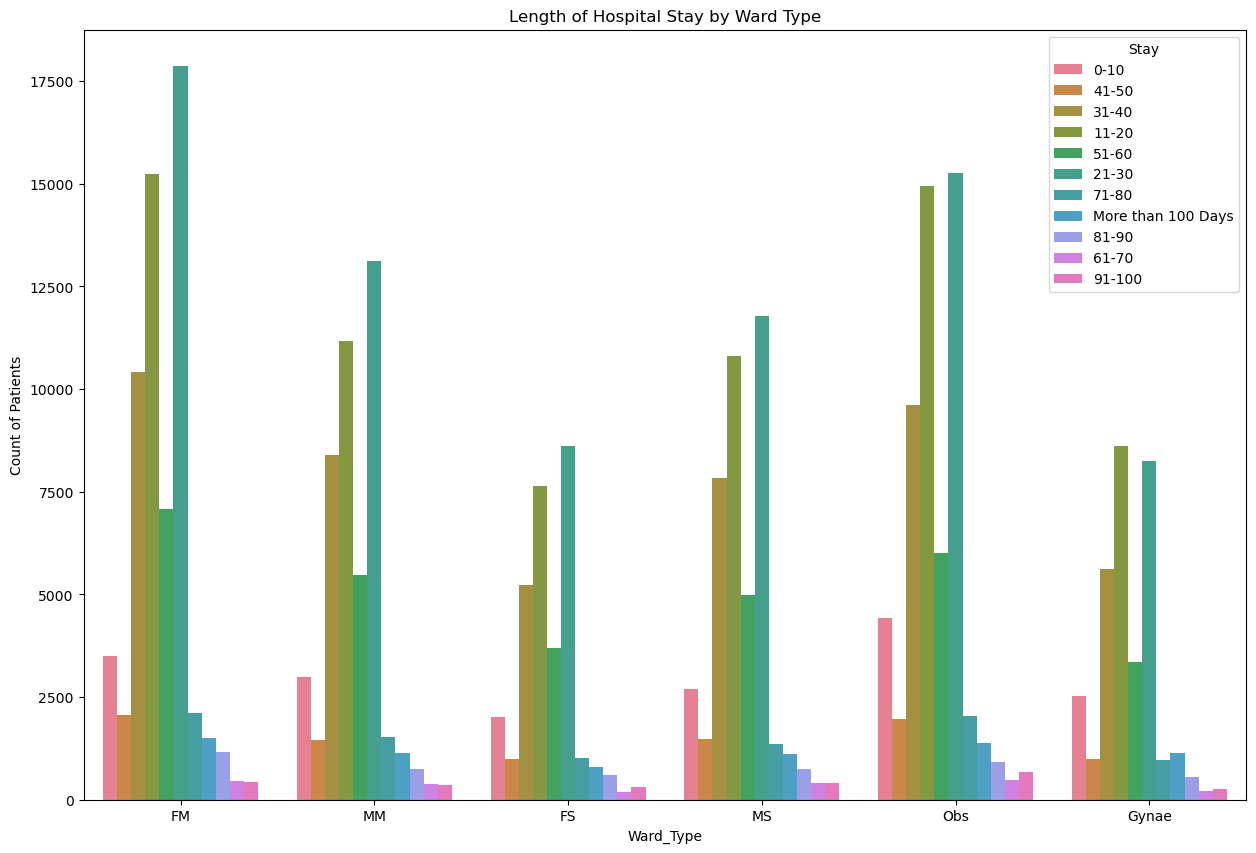

In [44]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Ward_Type', data=data, hue='Stay')
plt.xlabel('Ward_Type')
plt.ylabel('Count of Patients')
plt.title('Length of Hospital Stay by Ward Type')

Text(0.5, 1.0, 'Length of Hospital Stay by Department')

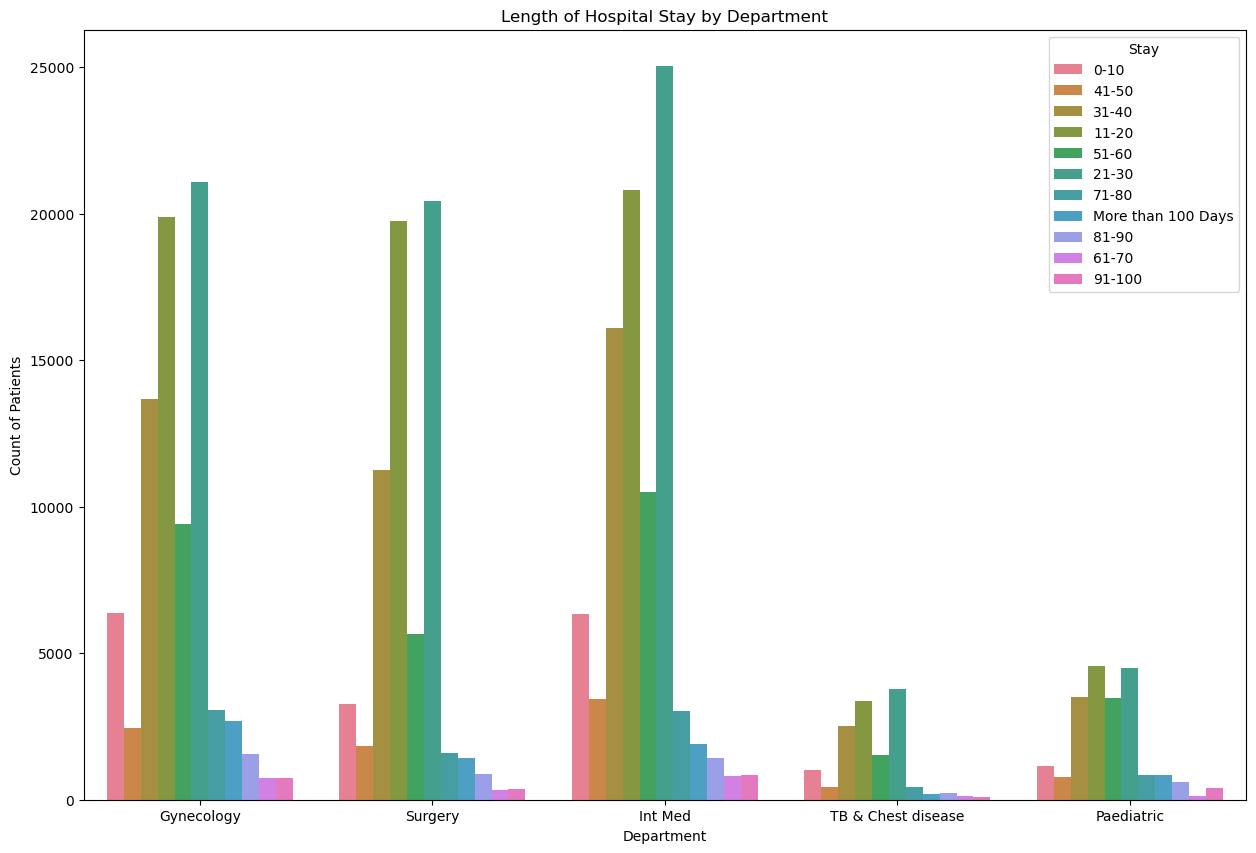

In [45]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Department', data=data, hue='Stay')
plt.xlabel('Department')
plt.ylabel('Count of Patients')
plt.title('Length of Hospital Stay by Department')

Text(0.5, 1.0, 'Length of Hospital Stay by Severity of Illness')

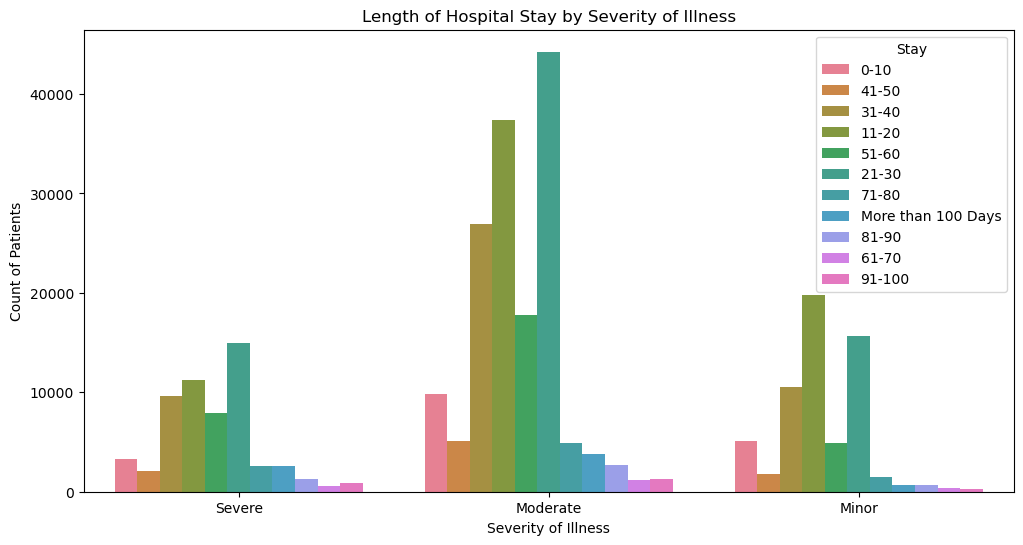

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Severity of Illness', data=data, hue='Stay')
plt.xlabel('Severity of Illness')
plt.ylabel('Count of Patients')
plt.title('Length of Hospital Stay by Severity of Illness')

Text(0.5, 1.0, 'Length of Hospital Stay by Type of Admission')

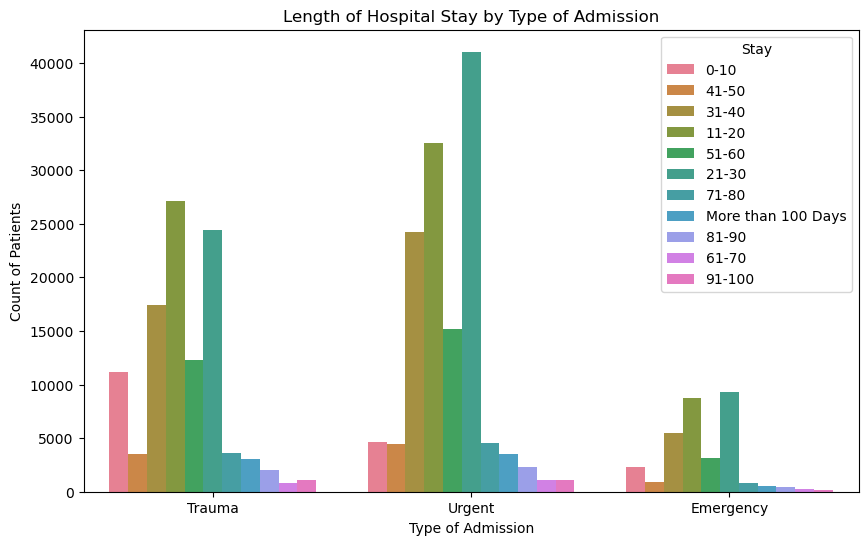

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Type of Admission', data=data, hue='Stay')
plt.xlabel('Type of Admission')
plt.ylabel('Count of Patients')
plt.title('Length of Hospital Stay by Type of Admission')

Text(0.5, 1.0, 'Length of Hospital Stay by Age')

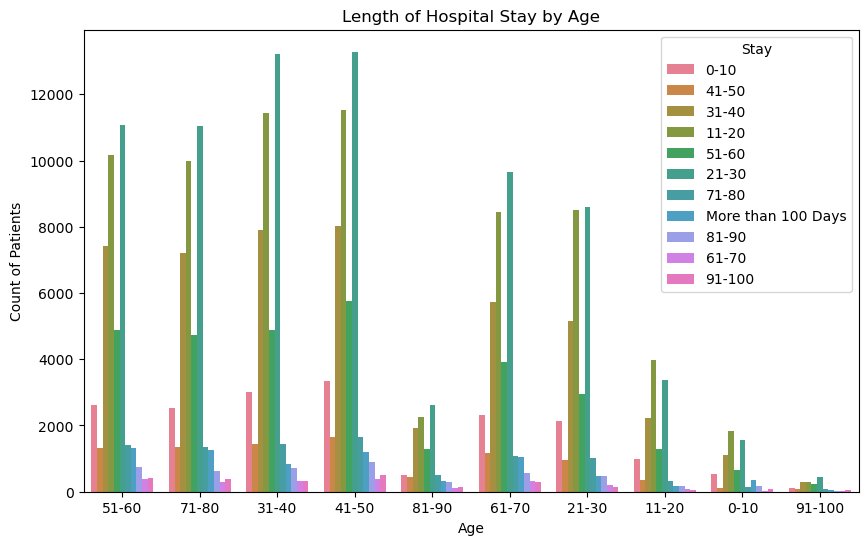

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=data, hue='Stay')
plt.xlabel('Age')
plt.ylabel('Count of Patients')
plt.title('Length of Hospital Stay by Age')

##### MULTIVARIATE

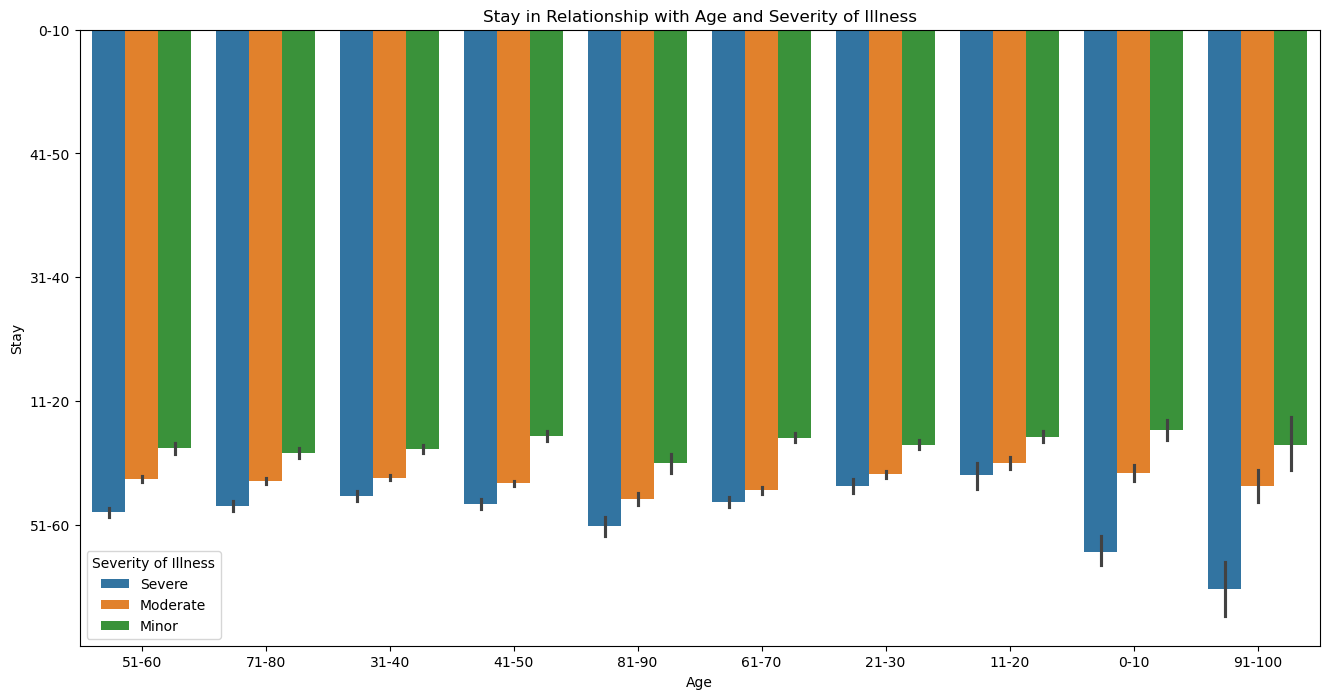

In [50]:
plt.figure(figsize=(16,8))
sns.barplot(y=('Stay'), x=('Age'), hue='Severity of Illness', data=data)
plt.title('Stay in Relationship with Age and Severity of Illness');

##### Both end of age spectrum (very young and very old) stayed longer in hospital with severity of illness

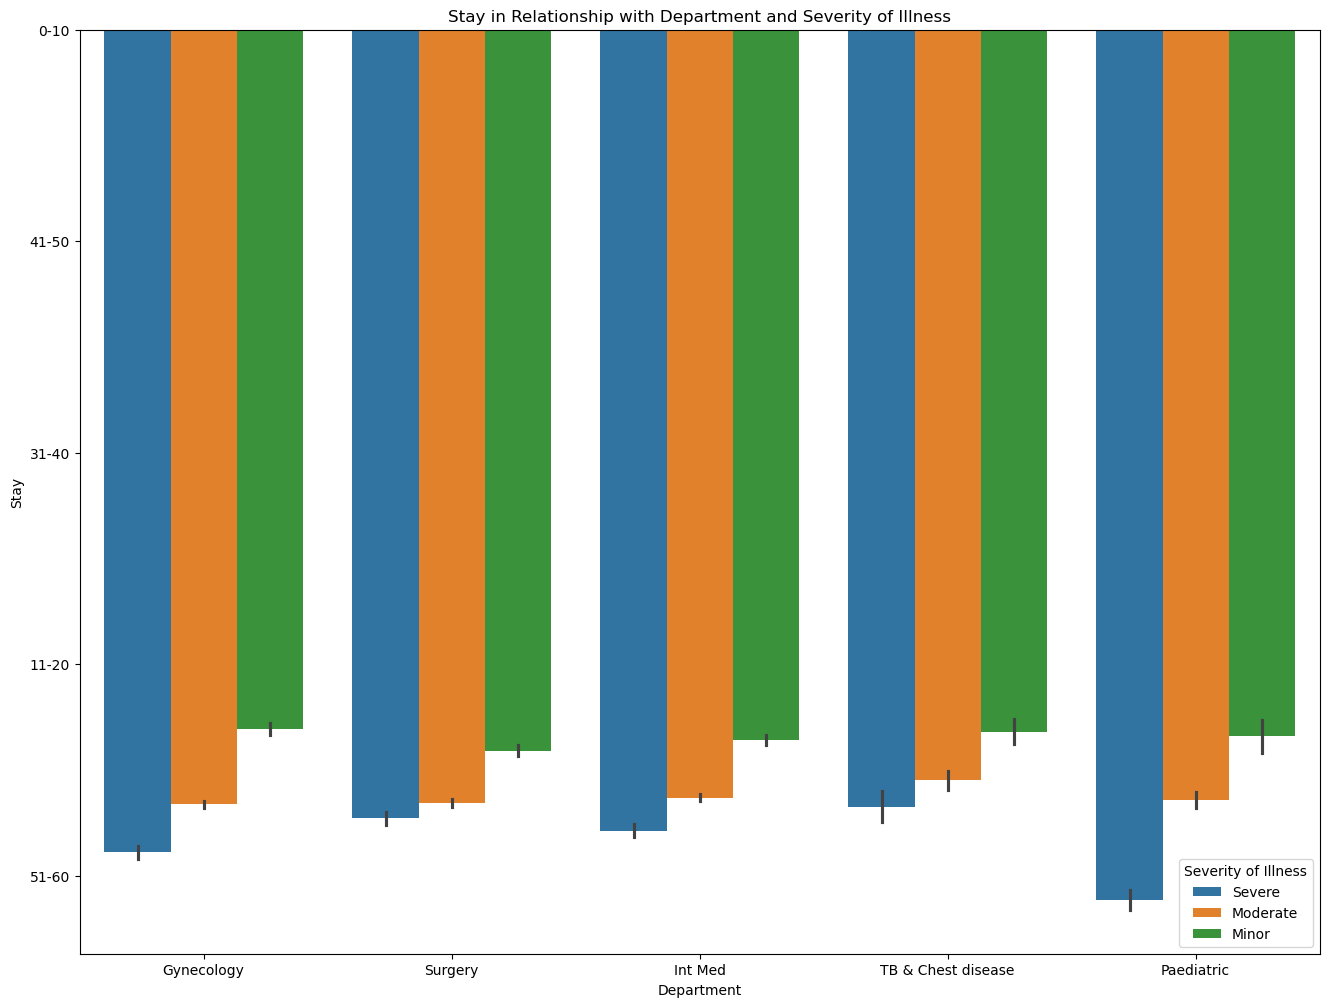

In [52]:
plt.figure(figsize=(16,12))
sns.barplot(y=('Stay'), x=('Department'), hue='Severity of Illness', data=data)
plt.title('Stay in Relationship with Department and Severity of Illness');

##### Across all departments, illness severity is directly related to length of stay. More severe cases stayed longer in hospital

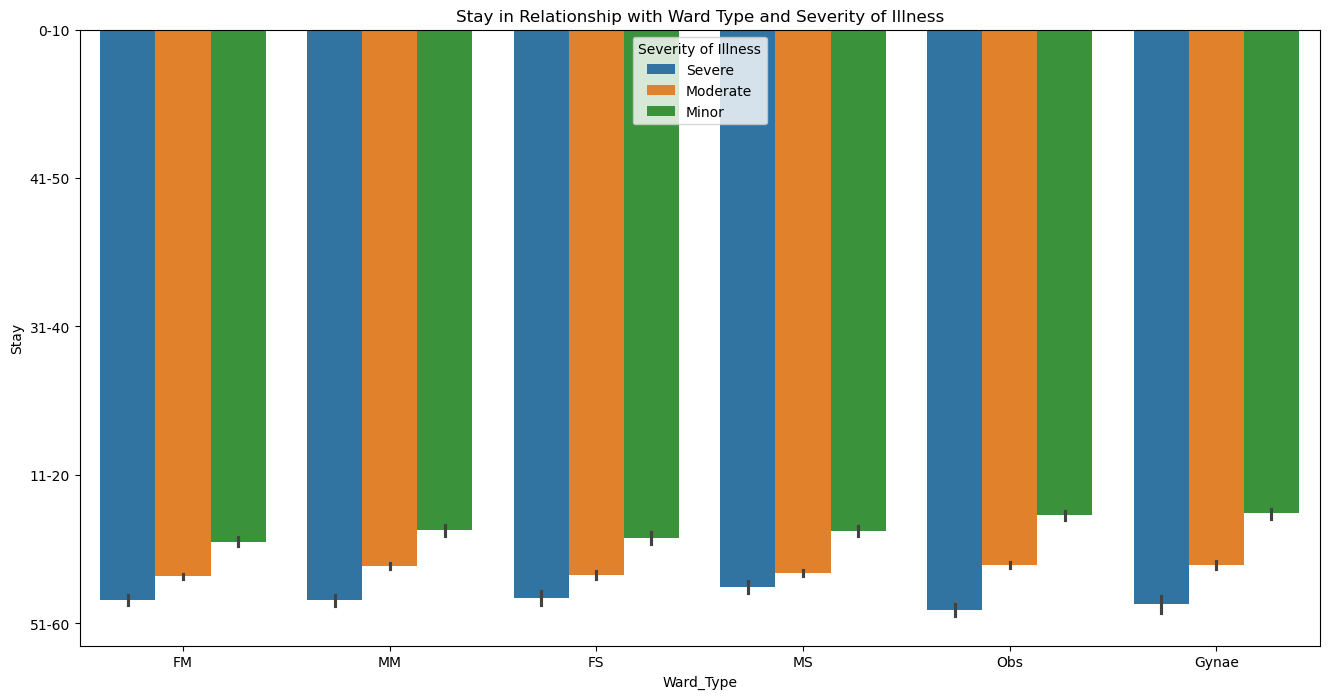

In [54]:
plt.figure(figsize=(16,8))
sns.barplot(y=('Stay'), x=('Ward_Type'), hue='Severity of Illness', data=data)
plt.title('Stay in Relationship with Ward Type and Severity of Illness');

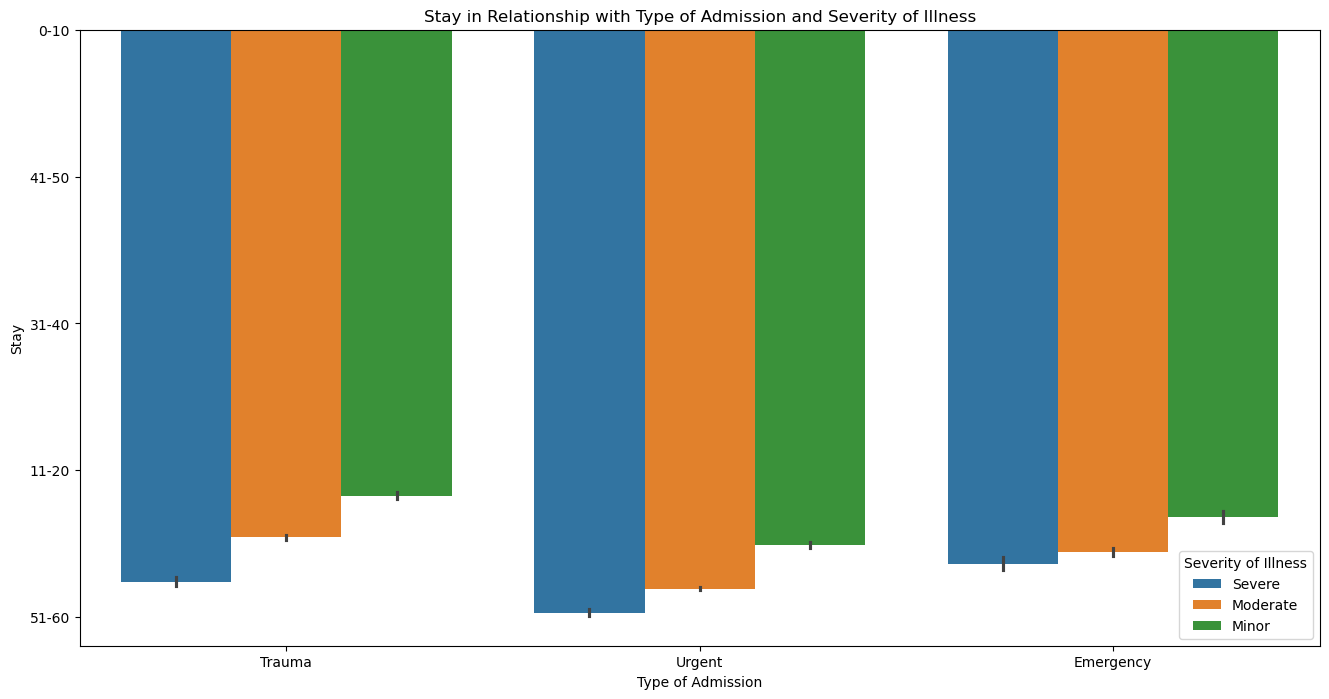

In [55]:
plt.figure(figsize=(16,8))
sns.barplot(y=('Stay'), x=('Type of Admission'), hue='Severity of Illness', data=data)
plt.title('Stay in Relationship with Type of Admission and Severity of Illness');

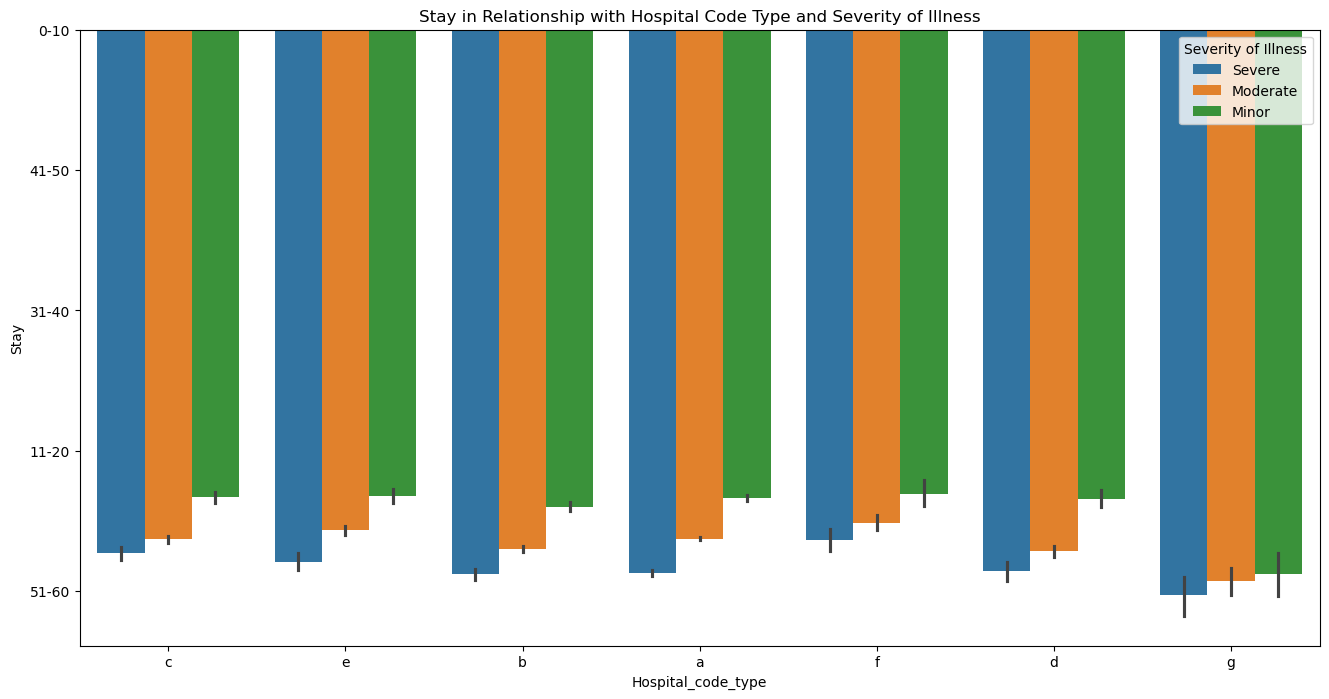

In [56]:
plt.figure(figsize=(16,8))
sns.barplot(y=('Stay'), x=('Hospital_code_type'), hue='Severity of Illness', data=data)
plt.title('Stay in Relationship with Hospital Code Type and Severity of Illness');

## DATA PREPROCESSING

In [58]:
#Drop redundant features
data1 = data.drop(['Unnamed: 0', 'case_id', 'patientid'], axis=1)

In [59]:
# Separate datset into target and predictor
label = data1.pop('Stay')

In [60]:
data1.head(3)

,Hospital_code_type,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age
0,c,3.0,Gynecology,FM,2.0,7.0,Trauma,Severe,2.0,51-60
1,c,2.0,Gynecology,FM,2.0,7.0,Urgent,Severe,2.0,51-60
2,e,2.0,Surgery,FM,2.0,7.0,Urgent,Severe,2.0,51-60


In [61]:
label.head(3)

0     0-10
1    41-50
2    31-40
Name: Stay, dtype: object

In [62]:
# Split dataset into training and validation subsets
x_train, x_test, y_train, y_test = train_test_split(data1, label, test_size=0.3, random_state=360)

In [63]:
# Normalize numerical features
scaler = StandardScaler()

num_var1 = x_train.select_dtypes(include=["int64", "float64"])
num_var2 = x_test.select_dtypes(include=["int64", "float64"])

scaled_x_train = pd.DataFrame(scaler.fit_transform(num_var1), columns=num_var1.columns)
scaled_x_test = pd.DataFrame(scaler.fit_transform(num_var2), columns=num_var2.columns)

In [64]:
# Encode categorical variable to numerical
encoder = OneHotEncoder(drop='first', sparse_output=False) 

cat_var1 = x_train.select_dtypes(include = "object")
cat_var2 = x_test.select_dtypes(include = "object")

encoded_x_train = pd.DataFrame(encoder.fit_transform(cat_var1), columns=encoder.get_feature_names_out(cat_var1.columns))
encoded_x_test = pd.DataFrame(encoder.fit_transform(cat_var2), columns=encoder.get_feature_names_out(cat_var2.columns))

In [65]:
# Merge the 2 training subset
final_x_train = pd.concat([scaled_x_train, encoded_x_train], axis=1)

In [66]:
# Merge the 2 test subset
final_x_test = pd.concat([scaled_x_test, encoded_x_test], axis=1)

In [67]:
# Save the scaler and encoder
def save_model_scaler_encoder(scaler, encoder):
    with open("num_scaler.pkl", "wb") as file:
        pickle.dump(scaler, file)
    
    with open("cat_encoder.pkl", "wb") as file:
        pickle.dump(encoder, file)

In [68]:
final_x_train.head(3)

,Available Extra Rooms in Hospital,Bed Grade,City_Code_Patient,Visitors with Patient,Hospital_code_type_b,Hospital_code_type_c,Hospital_code_type_d,Hospital_code_type_e,Hospital_code_type_f,Hospital_code_type_g,...,Severity of Illness_Severe,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,0.837557,-1.905248,0.180711,-0.68824,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.916676,-0.764627,0.180711,-0.68824,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.916676,-0.764627,-0.484366,-0.68824,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
final_x_test.head(3)

,Available Extra Rooms in Hospital,Bed Grade,City_Code_Patient,Visitors with Patient,Hospital_code_type_b,Hospital_code_type_c,Hospital_code_type_d,Hospital_code_type_e,Hospital_code_type_f,Hospital_code_type_g,...,Severity of Illness_Severe,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,0.832601,-0.772285,-0.488283,-0.687842,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.832601,-0.772285,0.626557,0.359458,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.913109,0.366891,-1.380154,-0.687842,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## MODEL BUILDING & EVALUATION

In [71]:
# Instantiate Logistic Regression Model
lr_mod = LogisticRegression(max_iter=1000)

In [72]:
# Train the model
lr_mod.fit(final_x_train, y_train)

LogisticRegression(max_iter=1000)

In [73]:
# Predict with the trained model
lr_pred = lr_mod.predict(final_x_test)

In [74]:
# Instantiate Random Forest Model
rf_mod = RandomForestClassifier()

In [75]:
# Train the model
rf_mod.fit(final_x_train, y_train)

RandomForestClassifier()

In [76]:
# Predict with the trained model
rf_pred = rf_mod.predict(final_x_test)

In [77]:
# Instantiate Naive Bayes Model
nb_mod = GaussianNB()

In [78]:
# Train the model
nb_mod.fit(final_x_train, y_train)

GaussianNB()

In [79]:
# Predict with the trained model
nb_pred = nb_mod.predict(final_x_test)

In [80]:
# Instantiate Bagging Classifier Model
bag_mod = BaggingClassifier()

In [81]:
# Train the model
bag_mod.fit(final_x_train, y_train)

BaggingClassifier()

In [82]:
# Predict with the trained model
bag_pred = bag_mod.predict(final_x_test)

In [83]:
# Instantiate Catboost Classifieir Model
cat_mod = CatBoostClassifier()

In [84]:
# Train the model
cat_mod.fit(final_x_train, y_train)

Learning rate set to 0.103441
0:	learn: 2.2295281	total: 391ms	remaining: 6m 30s
1:	learn: 2.1141488	total: 543ms	remaining: 4m 30s
2:	learn: 2.0296365	total: 699ms	remaining: 3m 52s
3:	learn: 1.9648023	total: 852ms	remaining: 3m 32s
4:	learn: 1.9121495	total: 1.01s	remaining: 3m 20s
5:	learn: 1.8711991	total: 1.16s	remaining: 3m 11s
6:	learn: 1.8353284	total: 1.32s	remaining: 3m 6s
7:	learn: 1.8045997	total: 1.47s	remaining: 3m 2s
8:	learn: 1.7790455	total: 1.64s	remaining: 3m
9:	learn: 1.7576421	total: 1.79s	remaining: 2m 57s
10:	learn: 1.7377769	total: 1.95s	remaining: 2m 55s
11:	learn: 1.7227987	total: 2.1s	remaining: 2m 52s
12:	learn: 1.7090225	total: 2.25s	remaining: 2m 51s
13:	learn: 1.6965049	total: 2.4s	remaining: 2m 49s
14:	learn: 1.6856985	total: 2.56s	remaining: 2m 48s
15:	learn: 1.6761773	total: 2.71s	remaining: 2m 46s
16:	learn: 1.6679864	total: 2.88s	remaining: 2m 46s
17:	learn: 1.6602770	total: 3.04s	remaining: 2m 45s
18:	learn: 1.6531227	total: 3.19s	remaining: 2m 45s


In [85]:
# Predict with the trained model
cat_pred = cat_mod.predict(final_x_test)

## MODEL EVALUATION

In [87]:
# Model evaluation for Logistic Regression model model
print("Logistic Regression Model:\n", classification_report(y_test,lr_pred))

Logistic Regression Model:
                     precision    recall  f1-score   support

              0-10       0.35      0.00      0.00      5300
             11-20       0.37      0.42      0.39     20461
             21-30       0.39      0.63      0.48     22442
             31-40       0.31      0.24      0.27     14136
             41-50       0.00      0.00      0.00      2685
             51-60       0.37      0.41      0.39      9332
             61-70       0.00      0.00      0.00       656
             71-80       1.00      0.00      0.00      2758
             81-90       0.00      0.00      0.00      1407
            91-100       0.00      0.00      0.00       708
More than 100 Days       0.50      0.35      0.41      2101

          accuracy                           0.37     81986
         macro avg       0.30      0.19      0.18     81986
      weighted avg       0.36      0.37      0.33     81986



In [88]:
# Model evaluation for Random Forest model
print("Random Forest Model:\n", classification_report(y_test,rf_pred))

Random Forest Model:
                     precision    recall  f1-score   support

              0-10       0.66      0.54      0.59      5300
             11-20       0.66      0.70      0.68     20461
             21-30       0.66      0.73      0.69     22442
             31-40       0.64      0.62      0.63     14136
             41-50       0.67      0.47      0.55      2685
             51-60       0.68      0.69      0.68      9332
             61-70       0.72      0.48      0.58       656
             71-80       0.74      0.59      0.66      2758
             81-90       0.80      0.65      0.72      1407
            91-100       0.82      0.59      0.69       708
More than 100 Days       0.82      0.77      0.80      2101

          accuracy                           0.67     81986
         macro avg       0.72      0.62      0.66     81986
      weighted avg       0.67      0.67      0.67     81986



In [89]:
# Model evaluation for Naive Bayes model
print("Naive Bayes Model:\n", classification_report(y_test,nb_pred))

Naive Bayes Model:
                     precision    recall  f1-score   support

              0-10       0.18      0.13      0.15      5300
             11-20       0.33      0.44      0.38     20461
             21-30       0.37      0.48      0.42     22442
             31-40       0.27      0.10      0.14     14136
             41-50       0.07      0.03      0.04      2685
             51-60       0.25      0.20      0.22      9332
             61-70       0.01      0.00      0.00       656
             71-80       0.11      0.04      0.06      2758
             81-90       0.07      0.04      0.05      1407
            91-100       0.03      0.07      0.04       708
More than 100 Days       0.22      0.47      0.30      2101

          accuracy                           0.30     81986
         macro avg       0.17      0.18      0.16     81986
      weighted avg       0.28      0.30      0.28     81986



In [90]:
# Model evaluation for Bagging Classifier model
print("Bagging Classifier Model:\n", classification_report(y_test,bag_pred))

Bagging Classifier Model:
                     precision    recall  f1-score   support

              0-10       0.58      0.55      0.56      5300
             11-20       0.65      0.69      0.67     20461
             21-30       0.66      0.70      0.68     22442
             31-40       0.63      0.61      0.62     14136
             41-50       0.64      0.47      0.54      2685
             51-60       0.68      0.67      0.67      9332
             61-70       0.66      0.47      0.55       656
             71-80       0.69      0.58      0.63      2758
             81-90       0.73      0.67      0.70      1407
            91-100       0.71      0.57      0.63       708
More than 100 Days       0.80      0.75      0.77      2101

          accuracy                           0.65     81986
         macro avg       0.67      0.61      0.64     81986
      weighted avg       0.65      0.65      0.65     81986



In [91]:
# Model evaluation for Catboost Classifier model
print("Catboost Classifier Model:\n", classification_report(y_test,cat_pred))

Catboost Classifier Model:
                     precision    recall  f1-score   support

              0-10       0.59      0.14      0.23      5300
             11-20       0.46      0.57      0.51     20461
             21-30       0.45      0.64      0.53     22442
             31-40       0.46      0.31      0.37     14136
             41-50       0.89      0.09      0.17      2685
             51-60       0.48      0.51      0.49      9332
             61-70       0.98      0.10      0.17       656
             71-80       0.72      0.21      0.32      2758
             81-90       0.63      0.38      0.47      1407
            91-100       0.88      0.29      0.43       708
More than 100 Days       0.69      0.60      0.65      2101

          accuracy                           0.47     81986
         macro avg       0.66      0.35      0.40     81986
      weighted avg       0.51      0.47      0.45     81986



#### Random Forest  and Bagging Classifiers outperformed other models

### HYPERPARAMETER TUNING OF THE BEST 2 PERFOMING MODELS

In [94]:
param_grid = {
    'n_estimators': [10, 50],       
    'max_samples': [0.5, 1.0],     
    'max_features': [0.5, 1.0],      
    'bootstrap': [True, False],         
    'bootstrap_features': [True, False],  
    'random_state': [42]                 
}

In [95]:
bag_mod_search = GridSearchCV(
    estimator=bag_mod,                   
    param_grid=param_grid,               
    scoring='accuracy',                  
    cv=5,                                
    n_jobs=-1                            
)

In [96]:
bag_mod_search.fit(final_x_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.5, 1.0], 'max_samples': [0.5, 1.0],
                         'n_estimators': [10, 50], 'random_state': [42]},
             scoring='accuracy')

In [97]:
best_params = bag_mod_search.best_params_
best_score = bag_mod_search.best_score_

In [98]:
tuned_bag_mod = bag_mod_search.best_estimator_

In [99]:
tuned_bag_pred = tuned_bag_mod.predict(final_x_test)

In [100]:
print("Tuned Bagging Classifier Model:\n", classification_report(y_test,tuned_bag_pred))

Tuned Bagging Classifier Model:
                     precision    recall  f1-score   support

              0-10       0.63      0.54      0.58      5300
             11-20       0.66      0.69      0.68     20461
             21-30       0.66      0.72      0.69     22442
             31-40       0.64      0.61      0.63     14136
             41-50       0.68      0.46      0.55      2685
             51-60       0.68      0.68      0.68      9332
             61-70       0.70      0.48      0.57       656
             71-80       0.73      0.59      0.65      2758
             81-90       0.75      0.67      0.71      1407
            91-100       0.76      0.59      0.66       708
More than 100 Days       0.80      0.77      0.78      2101

          accuracy                           0.66     81986
         macro avg       0.70      0.62      0.65     81986
      weighted avg       0.67      0.66      0.66     81986



In [101]:
param_grid = {
    'n_estimators': [10, 20, 50],      
    'max_depth': [2, 5, 10, None],     
    'min_samples_split': [1, 2, 4],     
    'min_samples_leaf': [1, 2, 4],     
    'bootstrap': [True, False]         
}

In [102]:
rf_mod_search = GridSearchCV(estimator=rf_mod, 
                           param_grid=param_grid, 
                           cv=5,    
                           n_jobs=-1, 
                           verbose=2,    
                           scoring='accuracy')

In [103]:
rf_mod_search.fit(final_x_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [1, 2, 4],
                         'n_estimators': [10, 20, 50]},
             scoring='accuracy', verbose=2)

In [104]:
best_params = rf_mod_search.best_params_
best_score = rf_mod_search.best_score_

In [105]:
tuned_rf_mod = rf_mod_search.best_estimator_

In [106]:
tuned_rf_pred = tuned_rf_mod.predict(final_x_test)

In [107]:
print("Tuned Random Forest Model:\n", classification_report(y_test,tuned_rf_pred))

Tuned Random Forest Model:
                     precision    recall  f1-score   support

              0-10       0.68      0.53      0.59      5300
             11-20       0.66      0.70      0.68     20461
             21-30       0.65      0.74      0.69     22442
             31-40       0.65      0.61      0.63     14136
             41-50       0.75      0.45      0.56      2685
             51-60       0.67      0.70      0.68      9332
             61-70       0.80      0.47      0.59       656
             71-80       0.79      0.57      0.66      2758
             81-90       0.83      0.64      0.72      1407
            91-100       0.86      0.59      0.70       708
More than 100 Days       0.83      0.78      0.80      2101

          accuracy                           0.67     81986
         macro avg       0.74      0.62      0.67     81986
      weighted avg       0.67      0.67      0.67     81986



#### SAVE BEST MODEL with the SCALER and the ENCODER

In [120]:
# Save the trained model
with open("tuned_rf_mod.pkl", "wb") as file:
    pickle.dump(tuned_rf_mod, file)
    
# Save the numerical scaler
with open("lhs_num_scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)
    
# Save the categorical encoder
with open("lhs_cat_encoder.pkl", "wb") as file:
    pickle.dump(encoder, file)

In [122]:
# Load saved model
with open("tuned_rf_mod.pkl", "rb") as file:
    model = pickle.load(file)

# Load saved scaler
with open("lhs_num_scaler.pkl", "rb") as file:
    scaler = pickle.load(file)

# Load saved encoder
with open("lhs_cat_encoder.pkl", "rb") as file:
    encoder = pickle.load(file)        

In [124]:
# Create a function for data preprocessing
def transform_data(data, scaler, encoder):
    # Separate numerical and categorical columns
    num_var = data.select_dtypes(include=["int64", "float64"])
    cat_var = data.select_dtypes(include="object")

    # Scale numerical data
    scaled_num_data = scaler.transform(num_var)
    scaled_num_data = pd.DataFrame(scaled_num_data, columns=num_var.columns)

    # Encode categorical data
    encoded_cat_data = encoder.transform(cat_var)
    encoded_column_names = encoder.get_feature_names_out(cat_var.columns)
    encoded_cat_data = pd.DataFrame(encoded_cat_data, columns=encoded_column_names)

    # Concatenate scaled numerical and encoded categorical data
    final_scaled_data = pd.concat([scaled_num_data, encoded_cat_data], axis=1)

    return final_scaled_data